# Predict Future Sales Kaggle
- Competición: https://www.kaggle.com/c/competitive-data-science-predict-future-sales/overview
- Evaluación: RMSE
- Objetivo: predecir las ventas para cada item, para cada tienda

In [230]:
import pandas as pd

df_train = pd.read_csv('data/sales_train.csv')
print(df_train.shape)
df_train.head()

(2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [231]:
df_train[['day', 'month', 'year']] = df_train['date'].str.split('.', expand=True)
df_train['year'] = df_train['year'].astype(int)
df_train['month'] = df_train['month'].astype(int)
df_train['day'] = df_train['day'].astype(int)

df_train['date_date'] = pd.to_datetime(df_train[['year', 'month', 'day']])

df_train.sort_values(['date', 'shop_id', 'item_id'], ascending = True, inplace=True)

df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,date_date
32569,01.01.2013,0,2,991,99.0,1.0,1,1,2013,2013-01-01
32552,01.01.2013,0,2,1472,2599.0,1.0,1,1,2013,2013-01-01
32632,01.01.2013,0,2,1905,249.0,1.0,1,1,2013,2013-01-01
32459,01.01.2013,0,2,2920,599.0,2.0,1,1,2013,2013-01-01
32504,01.01.2013,0,2,3320,1999.0,1.0,1,1,2013,2013-01-01


In [232]:
# Calculamos ventas por dia
df_train['vent_dia'] = df_train['item_price'] * df_train['item_cnt_day']
sales_by_date = df_train.groupby('date_date')['vent_dia'].sum()

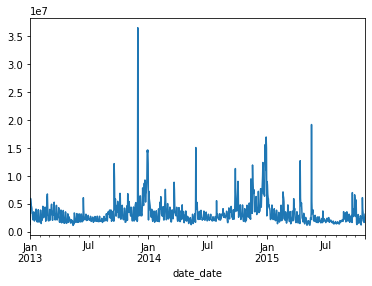

In [233]:
sales_by_date.plot();

In [234]:
print(sales_by_date)

date_date
2013-01-01    1362942.00
2013-01-02    6020512.03
2013-01-03    5436480.11
2013-01-04    4755664.00
2013-01-05    4587231.00
                 ...    
2015-10-27    2261143.13
2015-10-28    1722150.10
2015-10-29    1859613.14
2015-10-30    2620837.12
2015-10-31    3184379.08
Name: vent_dia, Length: 1034, dtype: float64


In [235]:
'''
CONJUNTO DE TEST
Ventas de los ultimos 60 dias
'''
print('Conjunto sin dividir:', len(sales_by_date))
final_test = sales_by_date[-60:]
print('Conjunto test:', len(final_test))


final_train = sales_by_date[:-60]
print('Conjunto sin dividir:', len(final_train))
print('Conjuntos train + test:', len(final_test) + len(final_train))

Conjunto sin dividir: 1034
Conjunto test: 60
Conjunto sin dividir: 974
Conjuntos train + test: 1034


In [236]:
print(final_test)

date_date
2015-09-02    1.824420e+06
2015-09-03    3.220860e+06
2015-09-04    2.751803e+06
2015-09-05    3.626496e+06
2015-09-06    2.961556e+06
2015-09-07    2.068312e+06
2015-09-08    2.211983e+06
2015-09-09    1.965025e+06
2015-09-10    2.025429e+06
2015-09-11    2.820355e+06
2015-09-12    3.202689e+06
2015-09-13    2.637602e+06
2015-09-14    1.753760e+06
2015-09-15    2.139906e+06
2015-09-16    2.671605e+06
2015-09-17    2.522769e+06
2015-09-18    2.794011e+06
2015-09-19    2.969821e+06
2015-09-20    2.270395e+06
2015-09-21    1.721418e+06
2015-09-22    7.060359e+06
2015-09-23    3.017047e+06
2015-09-24    2.745265e+06
2015-09-25    3.273877e+06
2015-09-26    4.076910e+06
2015-09-27    3.450078e+06
2015-09-28    2.995681e+06
2015-09-29    6.674607e+06
2015-09-30    6.006111e+06
2015-10-01    2.790191e+06
2015-10-02    3.920791e+06
2015-10-03    5.767587e+06
2015-10-04    4.661264e+06
2015-10-05    1.639809e+06
2015-10-06    1.339565e+06
2015-10-07    2.800208e+06
2015-10-08    2.01

## Preparamos conjuntos
### Datos de train

In [237]:
print('Len original de train', len(df_train))

# Vemos cual es la ultima fecha de train
print(final_train.tail(2))

# Comprobamos que la fecha siguiente a esa, es ya la del conjunto de test
print(final_test.head(2))

# Nos quedamos con la última fecha del conjunto de train calculado antes, 2015-09-19
ult_fecha_train = final_train.index[-1]
print('Ultima fecha de train', ult_fecha_train)

Len original de train 2935849
date_date
2015-08-31    2251743.00
2015-09-01    3445016.73
Name: vent_dia, dtype: float64
date_date
2015-09-02    1824420.33
2015-09-03    3220860.27
Name: vent_dia, dtype: float64
Ultima fecha de train 2015-09-01 00:00:00


In [238]:
# Filtramos el conjunto de train original para que solo estén fechas hasta 2015-09-01
df_train_kaggle = df_train.copy()[df_train['date_date'] <= ult_fecha_train]

# Comprobamos que las ultimas fechas del nuevo conjunto de train son las esperadas
df_train_kaggle['date_date'].sort_values().drop_duplicates()

32569     2013-01-01
112011    2013-01-02
109860    2013-01-03
102970    2013-01-04
53526     2013-01-05
             ...    
2775017   2015-08-28
2816025   2015-08-29
2794922   2015-08-30
2830012   2015-08-31
2865256   2015-09-01
Name: date_date, Length: 974, dtype: datetime64[ns]

In [239]:
# Hacemos lo mismo para el conjunto de test
df_test_kaggle = df_train.copy()[df_train['date_date'] > ult_fecha_train]

# Comprobamos las primeras fechas de test
print(df_test_kaggle['date_date'].sort_values().drop_duplicates()[:3])
print(df_test_kaggle['date_date'].sort_values().drop_duplicates()[-3:])

# Comprobamos que son 60 puntos
print('Len de test:', len(df_test_kaggle['date_date'].drop_duplicates()))
df_test_kaggle.sort_values(['date_date'])

2845289   2015-09-02
2861181   2015-09-03
2833964   2015-09-04
Name: date_date, dtype: datetime64[ns]
2901078   2015-10-29
2892543   2015-10-30
2885915   2015-10-31
Name: date_date, dtype: datetime64[ns]
Len de test: 60


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,date_date,vent_dia
2845289,02.09.2015,32,59,486,300.0,1.0,2,9,2015,2015-09-02,300.0
2877170,02.09.2015,32,24,13802,499.0,1.0,2,9,2015,2015-09-02,499.0
2877259,02.09.2015,32,24,14627,229.0,1.0,2,9,2015,2015-09-02,229.0
2877090,02.09.2015,32,24,15739,499.0,1.0,2,9,2015,2015-09-02,499.0
2877062,02.09.2015,32,24,17717,2050.0,1.0,2,9,2015,2015-09-02,2050.0
...,...,...,...,...,...,...,...,...,...,...,...
2932614,31.10.2015,33,25,13460,1099.0,1.0,31,10,2015,2015-10-31,1099.0
2933786,31.10.2015,33,25,13580,1799.0,1.0,31,10,2015,2015-10-31,1799.0
2933789,31.10.2015,33,25,13590,2199.0,1.0,31,10,2015,2015-10-31,2199.0
2933235,31.10.2015,33,25,15303,959.0,1.0,31,10,2015,2015-10-31,959.0


In [240]:
# Montamos los datos de train que van a Kaggle
df_train_kaggle = df_train_kaggle[['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day']].sort_index().reset_index(drop=True)
df_train_kaggle.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [241]:
# Montamos los datos de y_test que van a Kaggle
df_y_test_kaggle = pd.DataFrame(final_test)

In [242]:
# Ejemplo de submission_file
import numpy as np

df_submission_example = df_y_test_kaggle.copy()
df_submission_example['vent_dia'] = np.random.randint(1, 1000000, df_submission_example.shape[0])
df_submission_example['vent_dia'] = df_submission_example['vent_dia'].astype('float64') 
df_submission_example.head()

,vent_dia
date_date,
2015-09-02,4997.0
2015-09-03,731132.0
2015-09-04,89393.0
2015-09-05,598224.0
2015-09-06,497186.0


In [243]:
df_train_kaggle.to_csv('kaggle_data/train.csv', index=False)
df_y_test_kaggle.to_csv('kaggle_data/answer_key.csv')
df_submission_example.to_csv('kaggle_data/sample_submission.csv')